In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.metrics import pairwise_distances 
from sklearn.utils import shuffle 
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from collections import Counter
from sklearn.cluster import DBSCAN

In [2]:
df_original = pd.read_csv('Iris.csv')

In [3]:
data = df_original.iloc[:,:4]
labels = df_original.iloc[:,4]

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_dataset_2D = pd.DataFrame(X_pca,columns=['pca1','pca2'])

In [7]:
labels_numbered = labels.copy()
labels_numbered.replace('Iris-setosa',0, inplace=True)
labels_numbered.replace('Iris-virginica',1, inplace=True)
labels_numbered.replace('Iris-versicolor',2, inplace=True)

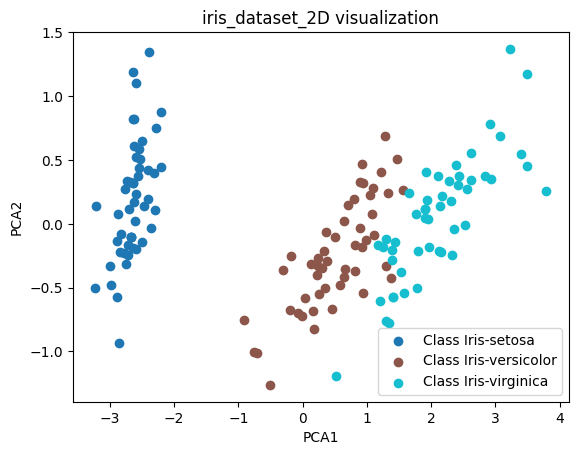

In [8]:
unique_labels = np.unique(labels)

colors = plt.cm.tab10(np.linspace(0,1,len(unique_labels)))

for color, label in zip(colors, unique_labels):
    mask = (label == labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

In [9]:
def purity_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for cluster in np.unique(y_pred):
        indices = (cluster == y_pred)
        label = y_true[indices]
        most_common = Counter(label).most_common(1)[0][1]
        total+=most_common
    return total/len(y_true)

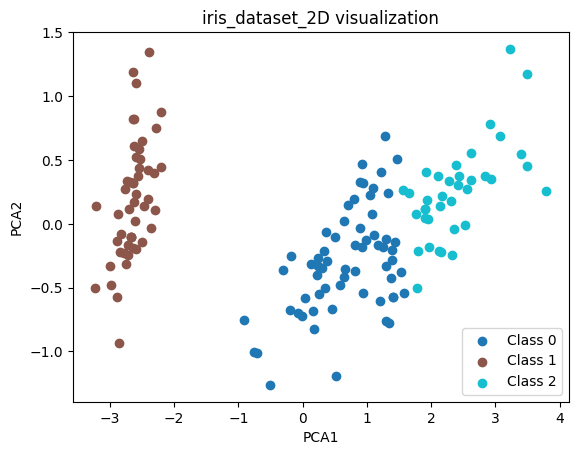

Purity score of above clustering is : 0.9


In [10]:
clustering= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)
cluster_labels = clustering.labels_

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

print(f"Purity score of above clustering is : {purity_score(labels, cluster_labels)}")

In [11]:
np.array(labels_numbered)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

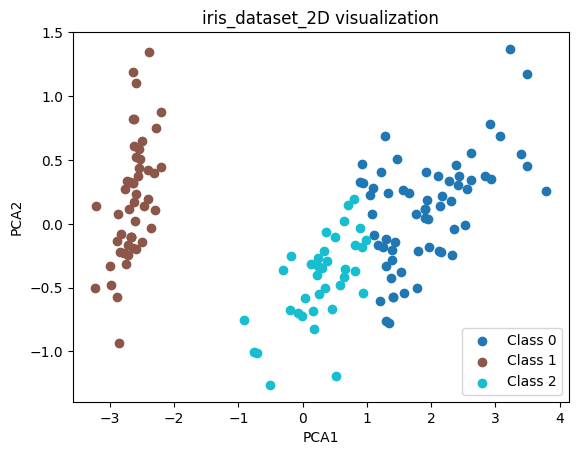

Purity score of above clustering is : 0.9


In [13]:
clustering1= AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X_pca)
cluster_labels = clustering1.labels_

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

print(f"Purity score of above clustering is : {purity_score(labels, cluster_labels)}")

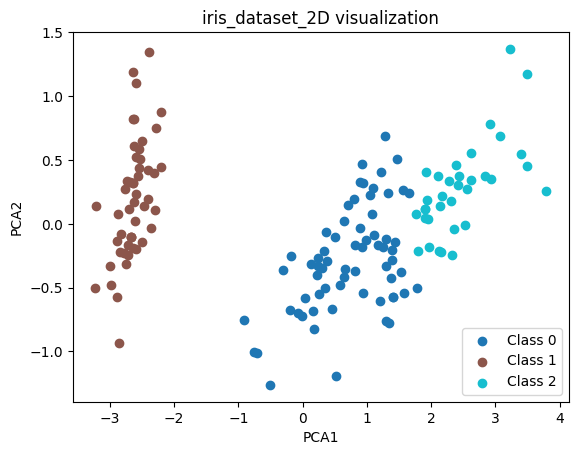

Purity score of above clustering is : 0.8933333333333333


In [14]:
clustering2= AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_pca)
cluster_labels = clustering2.labels_

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

print(f"Purity score of above clustering is : {purity_score(labels, cluster_labels)}")

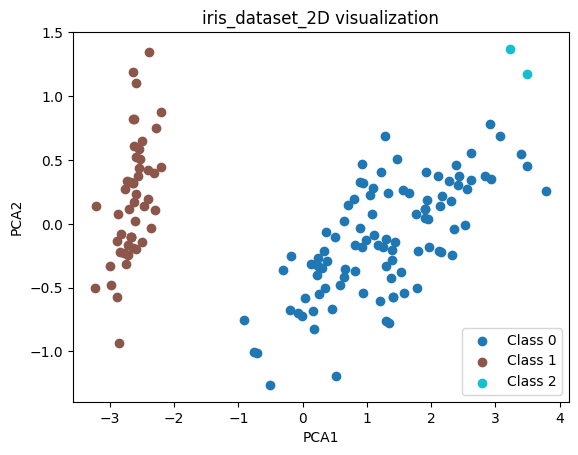

Purity score of above clustering is : 0.68


In [15]:
clustering3= AgglomerativeClustering(n_clusters=3, linkage='single').fit(X_pca)
cluster_labels = clustering3.labels_

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

print(f"Purity score of above clustering is : {purity_score(labels, cluster_labels)}")

In [16]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
clustering2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
clustering3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

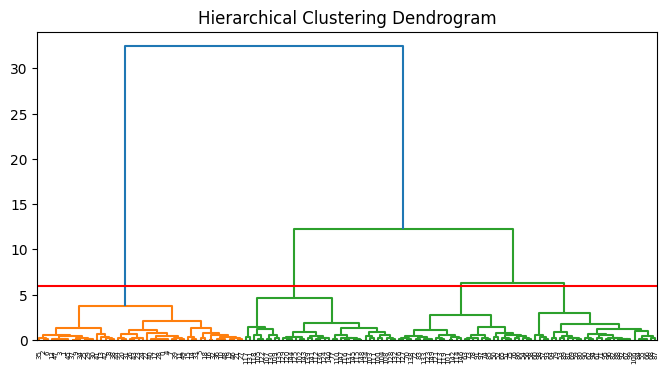

In [20]:
threshold = 6

linked = linkage(X_pca, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linked)
plt.axhline(y=threshold, color = "r",label = f"Threshold = {threshold}")

plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [21]:
print(f"From above and below figure we got optimal cluster size is - 4")
optim_cluster = 4

From above and below figure we got optimal cluster size is - 4


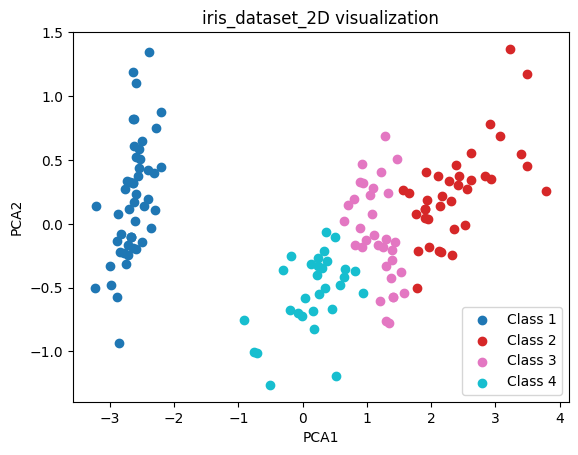

In [22]:
cluster_labels = fcluster(linked, t=6, criterion="distance")

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

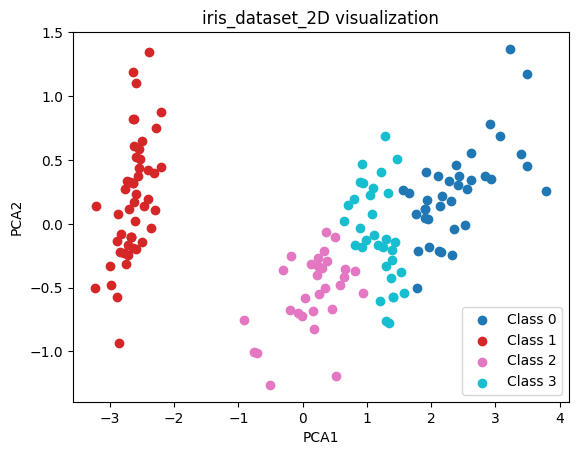

Purity score of above clustering is : 0.9000000000


In [23]:
clustering4= AgglomerativeClustering(n_clusters=optim_cluster, linkage='ward').fit(X_pca)
cluster_labels = clustering4.labels_

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

print(f"Purity score of above clustering is : {purity_score(labels, cluster_labels):.10f}")

In [24]:
print("Purity_Score_kmeans =  0.8333")
print("Purity_Score_kmedoid = 0.8467")
print("Purity_Score_Agglomerative = 0.9") 

Purity_Score_kmeans =  0.8333
Purity_Score_kmedoid = 0.8467
Purity_Score_Agglomerative = 0.9


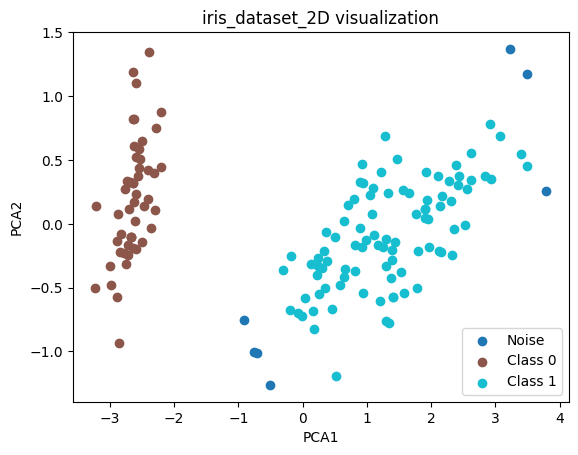

Purity score of above clustering is : 0.6783216783216783


In [25]:
db = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = db.fit_predict(X_pca)

unique_labels1 = np.unique(cluster_labels)

colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

for color, label in zip(colors1, unique_labels1):
    mask = (label == cluster_labels)
    label_string = f"Class {label}" if label!=-1 else "Noise"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

plt.title("iris_dataset_2D visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

mask = cluster_labels !=-1
print(f"Purity score of above clustering is : {purity_score(labels[mask], cluster_labels[mask])}")

In [26]:
eps_values =[1,5]
min_sample_values =[4,10]
labels_store = []

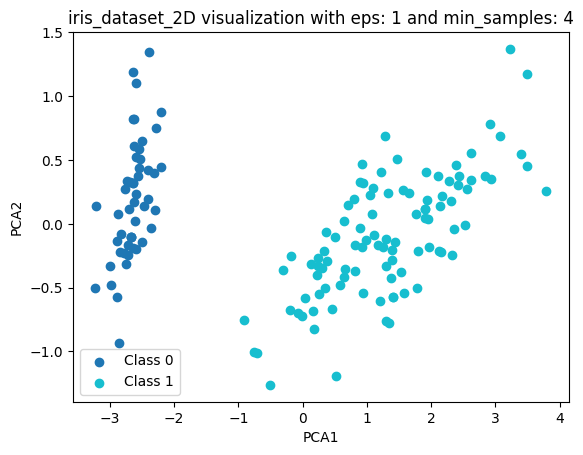

Purity score for clustering  with eps : 1 and min_sample : 4 is = 0.6666666666666666


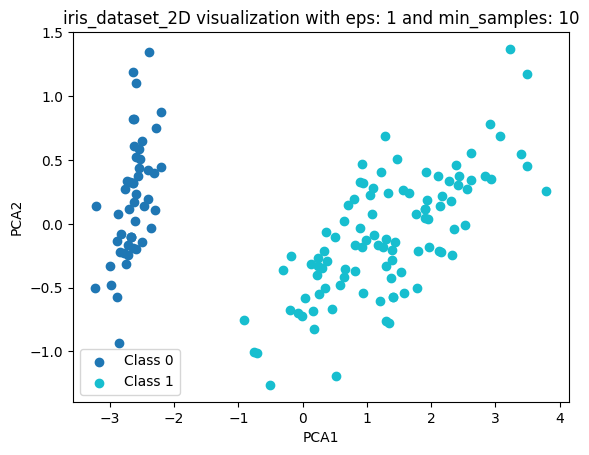

Purity score for clustering  with eps : 1 and min_sample : 10 is = 0.6666666666666666


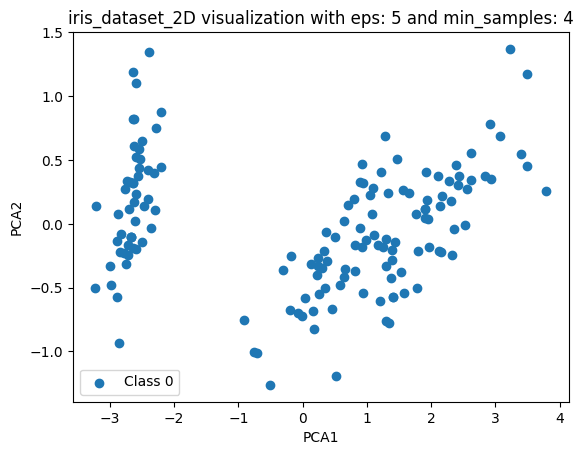

Purity score for clustering  with eps : 5 and min_sample : 4 is = 0.3333333333333333


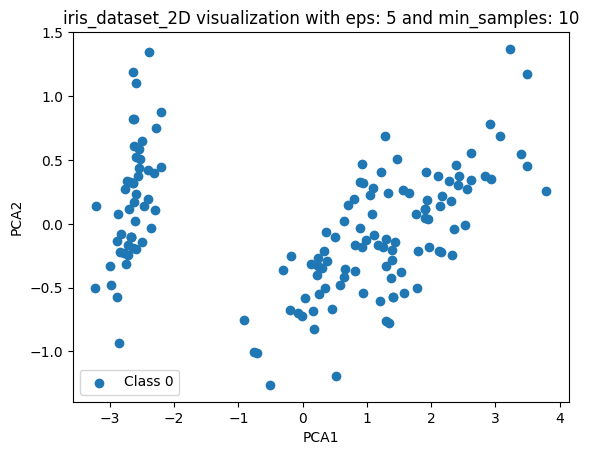

Purity score for clustering  with eps : 5 and min_sample : 10 is = 0.3333333333333333


In [27]:
for i in eps_values:
    for j in min_sample_values:
        db = DBSCAN(eps=i, min_samples=j)
        cluster_labels = db.fit_predict(X_pca)
        labels_store.append(cluster_labels)

        unique_labels1 = np.unique(cluster_labels)

        colors1 = plt.cm.tab10(np.linspace(0,1,len(unique_labels1)))

        for color, label in zip(colors1, unique_labels1):
            mask = (label == cluster_labels)
            label_string = f"Class {label}" if label!=-1 else "Noise"
            plt.scatter(X_pca[mask,0], X_pca[mask,1], c=[color], label = label_string)

        plt.title(f"iris_dataset_2D visualization with eps: {i} and min_samples: {j}")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.legend()
        plt.show()

        mask = cluster_labels !=-1
        print(f"Purity score for clustering  with eps : {i} and min_sample : {j} is = {purity_score(labels[mask], cluster_labels[mask])}")

In [28]:
new_df = pd.DataFrame(data)
new_df['Actual_Label'] = labels
new_df['Cluster'] = labels_store[0] 
new_df.replace('Iris-setosa',0, inplace=True)
new_df.replace('Iris-virginica',1, inplace=True)
new_df.replace('Iris-versicolor',2, inplace=True)

# Count actual labels in each cluster
cluster_label_counts1 = new_df.groupby('Actual_Label')['Cluster'].value_counts().unstack(fill_value=0)

N1 = len(new_df)

max_counts1 = cluster_label_counts1.max(axis=0).sum()
print("max_counts are:", max_counts1)

# Calculate purity
purity_score1 = max_counts1 / N1
print(f'Purity Score: {purity_score1:.4f}\n\n')

cluster_label_counts1

max_counts are: 100
Purity Score: 0.6667




Cluster,0,1
Actual_Label,,
0,50,0
1,0,50
2,0,50


In [29]:
store_i =[]
for i in cluster_label_counts1.columns:
    for j in range(len(cluster_label_counts1[i])):
        if (cluster_label_counts1[i][j] == cluster_label_counts1.max(axis=0)[i]):
            store_i.append(j)
            break

for i in range(len(store_i)):
    if store_i[i] == 0:
        store_i[i] = 'Iris-setosa'
    elif store_i[i]==1:
        store_i[i] = 'Iris-virginica'
    else:
        store_i[i] = 'Iris-versicolor'

In [30]:
store_i

['Iris-setosa', 'Iris-virginica']